Aggregating Warmup
Do your work in whatever format you feel most comfortable with (notebook, repl, etc). Get the data from the_data.csv into a data frame.
Make sure timestamp is a datetime type and set it as the index.
Answer the questions below:
By Group

What is the maximum x value for group B?
What is the average x value for group A?
What is the minimum x value for group C?
Which group has the highest sum of x values?
Time Aggregates

What is the least frequent y value for 2018-04-30?
What is the sum of the x values for 2018-05-01?
What is the average x value for each day? The median?
What is the most frequent y value for each day?
Visualization

Visualize the minimum x value of each group with a bar chart.
Visualize x over time.
Visualize x over time by y value.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('the_data.csv')

In [4]:
df.head()

,timestamp,x,y
0,2018-04-30 00:00:00,1.84,A
1,2018-04-30 01:00:00,1.47,C
2,2018-04-30 02:00:00,0.20,B
3,2018-04-30 03:00:00,0.17,C
4,2018-04-30 04:00:00,2.06,C


In [5]:
df.timestamp = pd.to_datetime(df.timestamp)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
timestamp    48 non-null datetime64[ns]
x            48 non-null float64
y            48 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ KB


In [9]:
df = df.set_index('timestamp')

What is the maximum x value for group B? What is the average x value for group A? What is the minimum x value for group C? Which group has the highest sum of x values? Time Aggregates

In [13]:
# max value for group B
df[df.y=='B'].groupby('y').max()
#df[df.y=='B'].x.max()

,x
y,
B,1.91


In [14]:
# average value of x for group A?
df[df.y=='A'].groupby('y').mean()

,x
y,
A,-0.110556


In [15]:
#maximum x value for group C?
df[df.y=='C'].groupby('y').max()

,x
y,
C,2.06


In [20]:
# Which group has the highest sum of values?
df.groupby('y').sum()

,x
y,
A,-1.99
B,-0.70
C,3.95


In [70]:
#from walkthrough:
# you can do multiple simultaneously using .agg:
df.groupby('y').agg(['min', 'max', 'mean'])

x                
    min   max      mean
y                      
A -1.30  1.84 -0.110556
B -2.05  1.91 -0.053846
C -1.83  2.06  0.232353

What is the least frequent y value for 2018-04-30? What is the sum of the x values for 2018-05-01? What is the average x value for each day? The median? What is the most frequent y value for each day? Visualization

In [82]:
# What is the least frequent y value for 2018-04-30?
df['2018-04-30'].groupby('y', as_index=False).count()

,y,x
0,A,10
1,B,7
2,C,7


In [24]:
# What is the sum of the x values for 2018-05-01
df['2018-05-01'].x.sum()

-4.02

In [25]:
# What is the average x value for each day?
df.resample('D').x.mean()

timestamp
2018-04-30    0.2200
2018-05-01   -0.1675
Freq: D, Name: x, dtype: float64

In [27]:
#The median? 
df.resample('D').x.median()

timestamp
2018-04-30    0.175
2018-05-01    0.220
Freq: D, Name: x, dtype: float64

In [49]:
# What is the most frequent y value for each day? 
df[['y']].groupby('y').resample('D').count()

y
y timestamp     
A 2018-04-30  10
  2018-05-01   8
B 2018-04-30   7
  2018-05-01   6
C 2018-04-30   7
  2018-05-01  10

In [85]:
# walkthrough: 
df.groupby(['y', df.index.date]).count()

x
y               
A 2018-04-30  10
  2018-05-01   8
B 2018-04-30   7
  2018-05-01   6
C 2018-04-30   7
  2018-05-01  10

Visualize the minimum x value of each group with a bar chart.
Visualize x over time.
Visualize x over time by y value.

In [54]:
xmins = df.groupby('y', as_index=False).min()
xmins

,y,x
0,A,-1.30
1,B,-2.05
2,C,-1.83


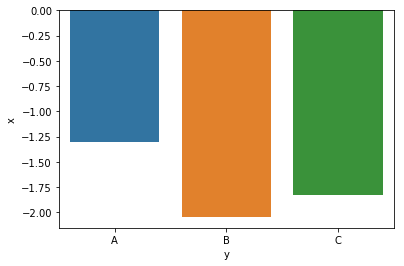

In [57]:
# Visualize the minimum x value of each group with a bar chart
sns.barplot(x='y', y='x', data = xmins)

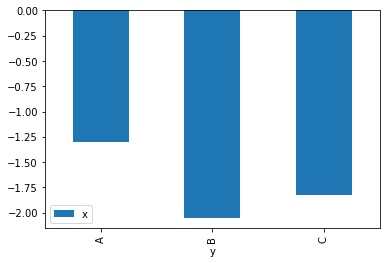

In [94]:
# clever walkthrough method: 
df.groupby('y').min().plot.bar()

,x,y
timestamp,,
2018-04-30 00:00:00,1.84,A
2018-04-30 01:00:00,1.47,C


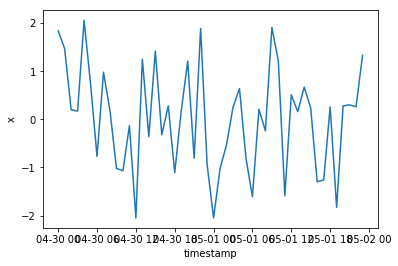

In [67]:
# Visualize x over time

sns.lineplot(x=df.index, y='x', data=df)

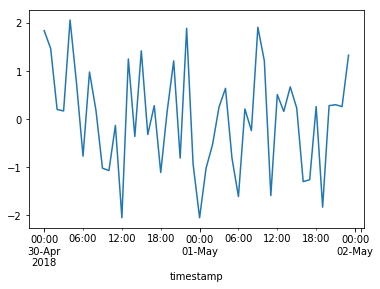

In [95]:
df.x.plot()

In [59]:
#  Visualize x over time by y value

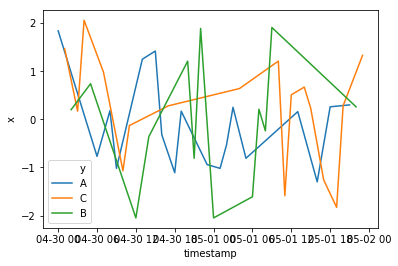

In [65]:
sns.lineplot(x=df.index, y='x', hue='y', data=df)

In [68]:
pd.__version__

'0.23.4'